In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = '正5負2.csv'
df = pd.read_csv(data)
df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [5]:
data1 = '前一年正5負2.csv'
df1 = pd.read_csv(data1)
df1 = df1[(df1.正負樣本 == 1) | (df1.正負樣本 == -1)]

In [6]:
# 查看數據集的維度
df.shape

(376, 37)

In [7]:
# 查看數據集的維度
df1.shape

(417, 17)

In [8]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,6.88,12.94,12.54,13.10,9.54,...,8.38,6.95,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,4.65,9.77,13.54,11.07,10.01,...,27.37,7.10,0,1,1,1,1,1,5,1
5,1109,信大,14.89,2.40,30.69,10.82,17.31,17.87,15.95,12.51,...,36.22,6.58,1,1,1,1,1,1,6,1
7,1203,味王,12.00,1.86,32.54,13.71,12.26,11.86,11.08,11.10,...,28.84,3.55,1,1,1,0,1,1,5,1
9,1213,大飲,-9.02,-0.89,4.96,0.29,-13.76,-7.37,-4.96,-19.31,...,12.91,0.00,0,0,0,0,1,1,2,-1


In [9]:
df1.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率,ROE_5YF,EPS_5YF,毛利率_5YF,現金殖利率_F,股價_F,董監持股_F,符合數量,正負樣本
0,1101,台泥,10.26,3.37,25.68,2.34,34.25,8.38,6.83,1,1,1,1,1,0,5,1
1,1102,亞泥,8.44,3.36,22.76,2.77,40.00,27.37,6.93,1,1,1,1,1,1,6,1
3,1104,環泥,7.57,2.02,13.30,1.04,20.45,24.16,5.09,1,1,0,1,1,1,5,1
5,1109,信大,12.95,1.98,27.76,1.00,15.65,36.26,6.39,1,1,1,1,1,1,6,1
7,1203,味王,12.19,1.84,31.49,1.10,31.80,28.84,3.46,1,1,1,0,1,1,5,1


In [10]:
df['正負樣本'].value_counts()

 1    207
-1    169
Name: 正負樣本, dtype: int64

In [11]:
df1['正負樣本'].value_counts()

 1    265
-1    152
Name: 正負樣本, dtype: int64

In [12]:
df['正負樣本'].value_counts()/np.float(len(df))

 1    0.550532
-1    0.449468
Name: 正負樣本, dtype: float64

In [13]:
df1['正負樣本'].value_counts()/np.float(len(df1))

 1    0.635492
-1    0.364508
Name: 正負樣本, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 937
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          376 non-null    int64  
 1   股票          376 non-null    object 
 2   ROE_5Y      376 non-null    float64
 3   EPS_5Y      376 non-null    float64
 4   毛利率_5Y      376 non-null    float64
 5   ROE_2017    376 non-null    float64
 6   ROE_2018    376 non-null    float64
 7   ROE_2019    376 non-null    float64
 8   ROE_2020    376 non-null    float64
 9   ROE_2021    376 non-null    float64
 10  毛利率_2017    376 non-null    float64
 11  毛利率_2018    376 non-null    float64
 12  毛利率_2019    376 non-null    float64
 13  毛利率_2020    376 non-null    float64
 14  毛利率_2021    376 non-null    float64
 15  負債比_2017    376 non-null    float64
 16  負債比_2018    376 non-null    float64
 17  負債比_2019    376 non-null    float64
 18  負債比_2020    376 non-null    float64
 19  負債比_2021    376 non-null    f

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 923
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   代碼       417 non-null    int64  
 1   股票       417 non-null    object 
 2   ROE_5Y   417 non-null    float64
 3   EPS_5Y   417 non-null    float64
 4   毛利率_5Y   417 non-null    float64
 5   現金股利     417 non-null    float64
 6   成交價      417 non-null    float64
 7   董監持股     417 non-null    float64
 8   現金殖利率    417 non-null    float64
 9   ROE_5YF  417 non-null    int64  
 10  EPS_5YF  417 non-null    int64  
 11  毛利率_5YF  417 non-null    int64  
 12  現金殖利率_F  417 non-null    int64  
 13  股價_F     417 non-null    int64  
 14  董監持股_F   417 non-null    int64  
 15  符合數量     417 non-null    int64  
 16  正負樣本     417 non-null    int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 58.6+ KB


In [16]:
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
ROE_2017      0
ROE_2018      0
ROE_2019      0
ROE_2020      0
ROE_2021      0
毛利率_2017      0
毛利率_2018      0
毛利率_2019      0
毛利率_2020      0
毛利率_2021      0
負債比_2017      0
負債比_2018      0
負債比_2019      0
負債比_2020      0
負債比_2021      0
稅後淨利率_2017    0
稅後淨利率_2018    0
稅後淨利率_2019    0
稅後淨利率_2020    0
稅後淨利率_2021    0
現金股利          0
成交價           0
董監持股          0
現金殖利率         0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
成交價_Test      0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [17]:
df1.isnull().sum()

代碼         0
股票         0
ROE_5Y     0
EPS_5Y     0
毛利率_5Y     0
現金股利       0
成交價        0
董監持股       0
現金殖利率      0
ROE_5YF    0
EPS_5YF    0
毛利率_5YF    0
現金殖利率_F    0
股價_F       0
董監持股_F     0
符合數量       0
正負樣本       0
dtype: int64

In [18]:
round(df.describe(),2)

,代碼,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
count,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00,...,376.00,376.00,376.0,376.00,376.00,376.00,376.00,376.00,376.00,376.0
mean,3848.43,4.65,2.49,18.86,3.68,4.26,4.20,2.67,8.77,19.20,...,19.60,4.48,0.5,0.72,0.48,0.48,0.91,0.65,3.74,0.1
std,2271.16,20.76,3.54,27.13,28.60,26.15,20.23,45.23,21.34,27.35,...,17.05,3.29,0.5,0.45,0.50,0.50,0.29,0.48,1.78,1.0
min,1101.00,-215.93,-7.49,-316.78,-287.14,-315.90,-154.95,-786.28,-131.17,-333.36,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,-1.0
25%,2339.50,-0.74,-0.09,9.52,0.14,0.12,-0.40,-1.42,1.84,10.95,...,7.45,2.03,0.0,0.00,0.00,0.00,1.00,0.00,2.00,-1.0
50%,3013.50,9.96,2.32,19.16,7.82,8.68,8.26,8.62,10.54,19.10,...,14.83,4.80,0.0,1.00,0.00,0.00,1.00,1.00,5.00,1.0
75%,5540.00,14.38,4.07,28.81,15.04,14.65,13.48,14.28,17.17,29.60,...,27.85,6.44,1.0,1.00,1.00,1.00,1.00,1.00,5.00,1.0
max,9955.00,41.34,20.67,93.30,64.83,72.81,109.75,72.03,122.37,92.69,...,80.32,29.37,1.0,1.00,1.00,1.00,1.00,1.00,6.00,1.0


In [19]:
round(df1.describe(),2)

,代碼,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率,ROE_5YF,EPS_5YF,毛利率_5YF,現金殖利率_F,股價_F,董監持股_F,符合數量,正負樣本
count,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00
mean,3810.87,4.13,2.06,20.50,1.86,38.49,20.87,4.50,0.64,0.73,0.55,0.46,0.93,0.71,4.02,0.27
std,2321.56,20.70,3.02,21.96,2.01,33.21,16.75,3.51,0.48,0.44,0.50,0.50,0.25,0.45,1.76,0.96
min,1101.00,-202.08,-7.86,-143.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.00
25%,2243.00,-0.52,-0.05,10.65,0.47,17.00,8.84,2.14,0.00,0.00,0.00,0.00,1.00,0.00,2.00,-1.00
50%,2881.00,8.13,1.82,21.24,1.40,31.00,16.35,4.58,1.00,1.00,1.00,0.00,1.00,1.00,5.00,1.00
75%,5525.00,13.03,3.37,31.07,2.56,49.60,30.14,6.32,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00
max,9955.00,60.13,16.20,93.09,15.95,286.00,90.70,31.40,1.00,1.00,1.00,1.00,1.00,1.00,6.00,1.00


In [20]:
X = df.drop(['代碼', '股票', 'ROE_2017', 'ROE_2018', 'ROE_2019', 'ROE_2020', 'ROE_2021', '毛利率_2017', '毛利率_2018', '毛利率_2019', '毛利率_2020', '毛利率_2021', '負債比_2017', '負債比_2018', '負債比_2019', '負債比_2020', '負債比_2021', '稅後淨利率_2017', '稅後淨利率_2018', '稅後淨利率_2019', '稅後淨利率_2020', '稅後淨利率_2021', 
             'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)
y = df['正負樣本']

In [21]:
X1 = df1.drop(['代碼', '股票', 'ROE_5YF', 'EPS_5YF', '毛利率_5YF', '現金殖利率_F', '股價_F', '董監持股_F', '符合數量', '正負樣本'], axis=1)
y1 = df1['正負樣本']

In [22]:
# 將 X 和 y 拆分為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
# 將 X1 和 y1 拆分為訓練集和測試集
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [24]:
X_train

,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率
409,-1.26,-0.22,52.92,0.58,0.00,6.14,0.00
322,-16.37,-2.67,6.73,0.50,17.90,7.74,2.79
414,9.43,3.22,38.80,3.06,40.25,45.04,7.60
628,10.85,2.62,45.26,2.02,39.55,15.64,5.11
323,17.74,8.06,40.15,3.42,47.55,29.36,7.19
...,...,...,...,...,...,...,...
812,19.76,8.90,19.92,5.44,70.10,14.30,7.76
520,10.17,2.26,5.46,1.97,25.75,12.21,7.65
327,10.95,2.13,8.76,1.79,28.85,33.29,6.20
127,17.38,3.10,16.15,2.26,31.85,31.97,7.10


In [25]:
X1_train

,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率
235,19.62,3.34,26.94,3.18,37.30,38.06,8.53
842,13.77,6.98,33.84,8.50,123.00,10.73,6.91
214,-18.23,-0.47,-6.05,0.00,4.53,13.81,0.00
540,-9.27,-0.46,19.69,0.00,17.90,13.74,0.00
411,13.24,3.61,28.92,2.50,38.90,4.26,6.43
...,...,...,...,...,...,...,...
734,-5.35,-0.69,16.40,0.47,14.45,37.97,3.25
412,-2.91,-0.28,1.15,0.12,8.69,50.41,1.38
278,14.03,3.91,3.94,3.02,54.40,22.61,5.55
95,-27.24,-3.86,-24.06,0.00,54.60,0.00,0.00


In [26]:
X_test

,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率
339,-20.04,-1.64,10.71,0.00,11.85,27.59,0.00
761,10.30,3.00,46.63,2.80,48.30,11.67,5.80
786,9.63,7.98,26.69,5.79,167.50,9.29,3.46
901,13.25,6.00,19.30,2.70,152.50,3.41,1.77
545,-2.11,-0.56,17.86,0.52,24.95,31.89,2.08
...,...,...,...,...,...,...,...
814,20.71,5.92,31.56,4.10,68.30,51.53,6.00
771,-3.93,-0.85,5.26,0.88,24.90,0.00,3.53
818,-69.24,-2.46,0.00,0.00,119.50,70.17,0.00
46,6.78,5.62,24.05,3.60,54.00,17.29,6.67


In [27]:
X1_test

,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率
906,-31.48,-1.68,-11.74,0.00,24.70,51.33,0.00
375,8.00,1.47,21.84,1.41,57.20,16.30,2.47
521,5.55,0.92,23.17,0.80,14.90,31.68,5.37
858,6.22,1.65,13.92,1.34,21.60,27.24,6.20
709,13.95,2.65,39.98,3.68,48.65,10.95,7.56
...,...,...,...,...,...,...,...
192,14.24,3.20,31.96,2.06,35.25,15.21,5.84
258,3.32,0.40,6.29,0.28,13.85,9.28,2.02
815,21.93,7.14,31.05,7.31,52.00,49.70,14.06
916,15.15,2.32,29.68,1.90,29.25,32.56,6.50


In [28]:
X_train.shape, X_test.shape, X1_train.shape, X1_test.shape

((263, 7), (113, 7), (291, 7), (126, 7))

In [29]:
cols = X_train.columns

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X1_test = scaler.transform(X1_test)

In [31]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [32]:
X1_test = pd.DataFrame(X1_test, columns=[cols])

In [33]:
X_train.describe()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金股利,成交價,董監持股,現金殖利率
count,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02
mean,-4.727946e-17,9.455892e-17,-6.754209e-17,6.247643e-17,-1.688552e-16,-1.013131e-16,-3.613502e-16
std,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00
min,-9.299365e+00,-2.408386e+00,-1.182257e+01,-9.200154e-01,-1.137047e+00,-1.144450e+00,-1.326516e+00
25%,-3.429443e-01,-7.448513e-01,-3.458181e-01,-7.509010e-01,-6.512810e-01,-7.138925e-01,-7.165305e-01
50%,2.606338e-01,-6.711484e-02,1.659078e-02,-2.387260e-01,-2.437186e-01,-3.229729e-01,7.776731e-02
75%,5.382514e-01,4.287899e-01,3.867631e-01,4.232361e-01,3.465702e-01,4.654727e-01,5.312338e-01
max,2.058081e+00,4.994119e+00,2.085886e+00,6.786770e+00,6.878849e+00,3.469608e+00,7.265943e+00


In [34]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X1_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9603


In [35]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9603


In [36]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9603


In [37]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9444


In [38]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9365


In [39]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9365


In [40]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([-1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1,  1,  1

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9962


In [42]:
# X_train.shape, y_train.shape
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
# X1_test.shape, y1_test.shape
print('Test set score: {:.4f}'.format(linear_svc.score(X1_test, y1_test)))

Training set score: 0.9962
Test set score: 0.9444


In [43]:
#y1_test.shape
y1_test.value_counts()

 1    90
-1    36
Name: 正負樣本, dtype: int64

In [44]:
# check null accuracy score

null_accuracy = (90/(90+36))

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7143


In [45]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9444


In [46]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9683


In [47]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9444


In [48]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X1_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y1_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8095


In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[36  0]
 [ 7 83]]

True Positives(TP) =  36

True Negatives(TN) =  83

False Positives(FP) =  0

False Negatives(FN) =  7


<AxesSubplot:>

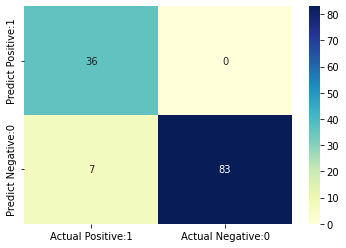

In [50]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.84      1.00      0.91        36
           1       1.00      0.92      0.96        90

    accuracy                           0.94       126
   macro avg       0.92      0.96      0.94       126
weighted avg       0.95      0.94      0.95       126



In [52]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [53]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9444


In [54]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0556


In [55]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [56]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8372


In [57]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8372


In [58]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [59]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


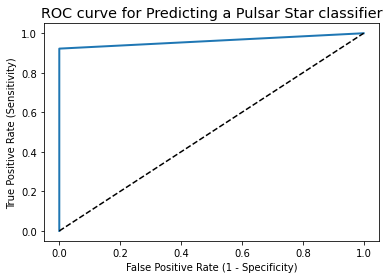

In [60]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y1_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [61]:
result = pd.DataFrame({'y_pred':y_pred})
result["ROE_5Y"] = X1_test.ROE_5Y
result
#result.to_csv('Test1.csv',index=False)

,y_pred,ROE_5Y
0,-1,-2.059255
1,-1,0.172995
2,1,0.034469
3,1,0.072351
4,1,0.509415
...,...,...
121,1,0.525812
122,-1,-0.091618
123,1,0.960615
124,1,0.577265
